## **Input Dataset**

In [ ]:
import pandas as pd

df = pd.read_csv ("/content/WineQT.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


## **Meninjau Apakah Dataset Sudah Bersih dan Bebas Dari Null**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [ ]:
df.isnull().sum()

nonull = 0
null = 0

for i in df.isnull().sum():
  if i > 0:
    print(i)
    print(f"Ada data yang kosong yaitu {i}")
    nonull += 1
  else:
    null += 1

if nonull == 0:
  print("Tidak ada data yang kosong")
else:
  print(f"Tidak ada data yang kosong yaitu {i}")

Tidak ada data yang kosong


## **Menghapus Variabel Yang Tidang Diperlukan**

In [ ]:
# Menghapus kolom 'ID Wine'
df.drop(columns=['Id'], inplace=True)

# Menampilkan DataFrame untuk memastikan kolom terhapus
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


## **Mengubah Variabel Independen Menjadi X dan Variabel Dependen Menjadi Y**

In [ ]:
# Mengganti nama variabel menjadi x1, x2, dan y
df.rename(columns={'fixed acidity': 'x1', 'volatile acidity': 'x2', 'citric acid': 'x3', 'residual sugar' : 'x4',
                   'chlorides' : 'x5', 'free sulfur dioxide' : 'x6', 'total sulfur dioxide' : 'x7', 'density' : 'x8',
                   'pH' : 'x9', 'sulphates' : 'x10', 'alcohol' : 'x11', 'quality' : 'y'}, inplace=True)
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,y
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


## **Machine Learning**

### **Gaussian Naive Bayes**

In [ ]:
x = df[['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']].values
y = df['y'].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
print ("x_train = ", len(x_train))
print ("x_test = ", len(x_test))
print ("y_train = ", len(y_train))
print ("y_test = ", len(y_test))

x_train =  800
x_test =  343
y_train =  800
y_test =  343


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
sc = StandardScaler()

x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[ 0.92373029,  2.53471034,  0.28849944, ..., -0.42932722,
        -1.05842836, -0.97253583],
       [ 0.44933823, -0.44767421,  1.17119737, ...,  0.2319392 ,
        -0.52330553, -0.69121897],
       [-0.38084788,  5.91099473, -1.37304962, ...,  1.22383882,
        -1.5340931 ,  0.43404847],
       ...,
       [-0.49944589, -1.01038827,  0.34042284, ...,  0.29806584,
        -0.34493126,  1.37177134],
       [-0.20295085,  0.22758267,  0.23657603, ..., -0.16482065,
         0.19019157, -0.87876354],
       [-0.44014688, -0.05377436,  0.7038867 , ..., -0.36320058,
        -0.10709889,  1.27799905]])

In [ ]:
x_test

array([[-0.85523994,  0.4526683 , -1.16535599, ...,  0.69482569,
        -0.34493126, -0.87876354],
       [-0.79594093,  1.74691065, -0.28265805, ...,  1.42221874,
         0.36856585, -1.12882297],
       [-0.73664192,  0.28385408, -0.74996873, ...,  0.82707897,
        -1.05842836,  0.05895933],
       ...,
       [ 2.5248035 , -0.89784546,  1.48273782, ..., -1.09059364,
         0.96314677, -0.03481296],
       [ 0.9830293 , -0.22258858,  1.63850805, ..., -0.16482065,
        -0.46384744, -1.34762498],
       [-0.73664192,  1.21233228, -0.74996873, ..., -0.62770714,
        -0.40438935, -0.87876354]])

In [ ]:
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(x_test)
y_pred

array([6, 5, 5, 4, 7, 7, 5, 5, 6, 5, 7, 6, 5, 6, 6, 5, 6, 6, 6, 6, 6, 5,
       5, 7, 6, 5, 7, 7, 5, 6, 6, 6, 7, 6, 6, 5, 5, 6, 7, 4, 7, 5, 7, 5,
       5, 5, 6, 7, 5, 6, 7, 5, 6, 5, 6, 7, 6, 6, 7, 6, 6, 6, 6, 6, 6, 6,
       7, 6, 5, 6, 8, 5, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 4, 6,
       6, 6, 3, 6, 4, 5, 5, 5, 6, 6, 7, 6, 6, 7, 5, 6, 6, 5, 6, 7, 6, 7,
       6, 5, 6, 6, 5, 5, 6, 7, 6, 5, 5, 5, 5, 4, 5, 6, 6, 6, 5, 7, 5, 5,
       5, 6, 8, 3, 5, 6, 6, 6, 7, 5, 6, 5, 7, 5, 5, 6, 4, 5, 7, 6, 7, 5,
       6, 6, 6, 6, 7, 6, 7, 5, 6, 6, 6, 6, 7, 6, 6, 5, 7, 6, 5, 6, 5, 5,
       7, 5, 6, 5, 7, 6, 4, 6, 5, 5, 6, 5, 7, 5, 6, 6, 7, 6, 6, 6, 5, 7,
       7, 6, 6, 6, 5, 6, 6, 7, 5, 5, 6, 7, 5, 7, 5, 6, 6, 5, 7, 5, 7, 6,
       6, 6, 5, 6, 5, 6, 6, 5, 6, 5, 7, 7, 5, 5, 6, 7, 5, 6, 6, 5, 6, 7,
       6, 5, 6, 6, 5, 6, 7, 5, 5, 5, 4, 6, 5, 6, 7, 6, 5, 5, 6, 6, 7, 6,
       5, 5, 6, 7, 5, 6, 6, 7, 7, 6, 5, 6, 5, 6, 6, 5, 6, 7, 5, 5, 5, 7,
       5, 5, 6, 7, 6, 5, 7, 6, 6, 6, 6, 5, 6, 5, 5,

In [ ]:
classifier.predict_proba(x_test)

array([[2.93157238e-02, 1.17942420e-02, 4.68010022e-01, 4.81205052e-01,
        9.36797195e-03, 3.06987539e-04],
       [6.00934628e-04, 3.74249831e-02, 8.74658041e-01, 8.70114937e-02,
        2.65212327e-04, 3.93355770e-05],
       [3.40806477e-13, 9.09058637e-05, 9.80924009e-01, 1.89762005e-02,
        8.74381741e-06, 1.40674643e-07],
       ...,
       [4.29166237e-08, 1.67698284e-04, 4.01817707e-02, 3.53968516e-01,
        5.68648008e-01, 3.70339641e-02],
       [7.32645623e-02, 1.86072005e-03, 3.31789926e-01, 5.44549116e-01,
        4.83837549e-02, 1.51920582e-04],
       [9.24474477e-04, 8.60929440e-03, 8.14445045e-01, 1.75610466e-01,
        4.10717119e-04, 3.61321646e-09]])

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  7,  2,  0,  0],
       [ 2,  5, 76, 53,  6,  1],
       [ 2,  6, 27, 83, 27,  1],
       [ 0,  0,  4, 10, 27,  0],
       [ 0,  0,  0,  1,  3,  0]])

In [ ]:
akurasi = classification_report(y_test, y_pred)
print(akurasi)

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         9
           5       0.67      0.53      0.59       143
           6       0.56      0.57      0.56       146
           7       0.43      0.66      0.52        41
           8       0.00      0.00      0.00         4

    accuracy                           0.54       343
   macro avg       0.28      0.29      0.28       343
weighted avg       0.57      0.54      0.55       343



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
akurasi_score = accuracy_score(y_test, y_pred)
akurasi_score

0.5422740524781341

Text(0.5, 1.0, 'Confusion Matrix - Naive Bayes')

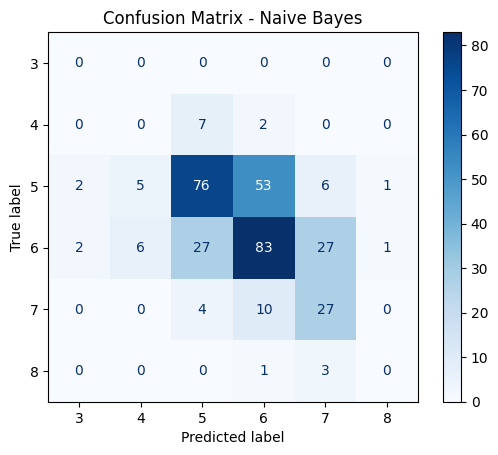

In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Get unique classes from y_test and y_pred
classes = np.unique(np.concatenate((y_test, y_pred)))

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=classes)

# Create the ConfusionMatrixDisplay object with the correct number of labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)

disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix - Naive Bayes")

Penjelasan


---
* Pada Label 3 :
Tidak ada sampel yang menunjukkan di label / rentang ke - 3

* Pada Label 4 :
1. Terdapat 7 sampel yang seharusnya di label / rentang ke - 4, tetapi diprediksi salah sebagai label ke - 5
2. Terdapat 2 sampel yang seharusnya di label / rentang ke - 4, tetapi diprediksi salah sebagai label ke - 6

* Pada Label 5 :
1. Terdapat 2 sampel yang seharusnya di label / rentang ke - 5, tetapi di prediksi salah rentang ke - 3
2. Terdapat 5 sampel yang seharusnya di label / rentang ke - 5, tetapi di prediksi salah rentang ke - 4
3. Terdapat 76 sampel yang benar di label / rentang ke - 5
4. Terdapat 53 sampel yang seharusnya di label / rentang ke - 5, tetapi di prediksi salah rentang ke - 6
5. Terdapat 6 sampel yang seharusnya di label / rentang ke - 5, tetapi di prediksi salah rentang ke - 7
6. Terdapat 1 sampel yang seharusnya di label / rentang ke - 5, tetapi di prediksi salah rentang ke - 8

* Pada Label 6 :
1. Terdapat 2 sampel yang seharusnya di label / rentang ke - 6, tetapi di prediksi salah di rentang ke - 3
2. Terdapat 6 sampel yang seharusnya di label / rentang ke - 6, tetapi di prediksi salah di rentang ke - 4
3. Terdapat 27 sampel yang seharusnya di label / rentang ke - 6, tetapi di prediksi salah di rentang ke - 5
4. Terdapat 83 sampel yang benar di label / rentang ke - 6
5. Terdapat 27 sampel yang seharusnya di label / rentang ke - 6, tetapi di prediksi salah di rentang ke - 7
6. Terdapat 1 sampel yang seharusnya di label / rentang ke - 6, tetapi di prediksi salah di rentang ke - 8

* Pada Label 7 :
1. Terdapat 4 sampel yang seharusnya di label / rentang ke - 7, tetapi di prediksi salah di rentang ke - 5
2. Terdapat 10 sampel yang seharusnya di label / rentang ke - 7, tetapi di prediksi salah di rentang ke - 6
3. Terdapat 27 sampel yang benar di label / rentang ke - 7

* Pada Label 8 :
1. Terdapat 1 sampel yang seharusnya di label / rentang ke - 8, tetapi di prediksi salah di rentang ke - 6
2. Terdapat 3 sampel yang benar di label / rentang ke - 8, tetapi di prediksi salah di rentang ke - 7

### **Random Forest**

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  7,  2,  0,  0],
       [ 2,  5, 76, 53,  6,  1],
       [ 2,  6, 27, 83, 27,  1],
       [ 0,  0,  4, 10, 27,  0],
       [ 0,  0,  0,  1,  3,  0]])

Accuracy: 0.6501457725947521

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         9
           5       0.68      0.75      0.71       143
           6       0.62      0.64      0.63       146
           7       0.64      0.51      0.57        41
           8       1.00      0.25      0.40         4

    accuracy                           0.65       343
   macro avg       0.59      0.43      0.46       343
weighted avg       0.64      0.65      0.64       343



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Text(0.5, 1.0, 'Confusion Matrix - Random Forest')

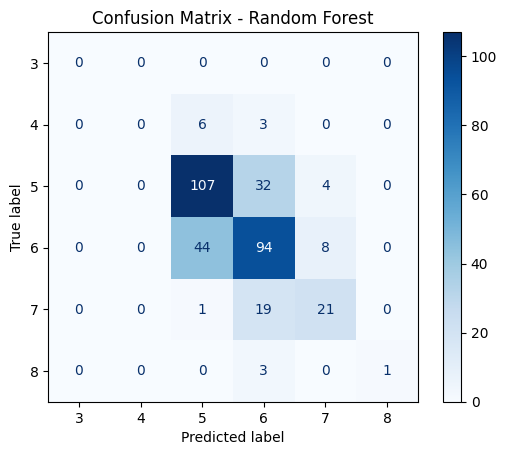

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score
import numpy as np

# 1. Melatih model Random Forest
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(x_train, y_train)

# 2. Melakukan prediksi
y_pred = rf_model.predict(x_test)

# 3. Evaluasi model (menghitung akurasi dan membuat laporan klasifikasi)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Standarisasi fitur
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

# 4. Membuat Confusion Matrix
# Tentukan rentang label (misalnya: [3, 4, 5, 6, 7, 8])
labels = [3, 4, 5, 6, 7, 8]

# Hitung Confusion Matrix
cm = confusion_matrix(y_test, y_pred, labels=labels)

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues")
disp.ax_.set_title("Confusion Matrix - Random Forest")


Penjelasan


---
* Pada Label 3 :
Tidak ada sampel yang menunjukkan di label / rentang ke - 3

* Pada Label 4 :
1. Terdapat 6 sampel yang seharusnya di label / rentang ke - 4, tetapi diprediksi salah sebagai label ke - 5
2. Terdapat 3 sampel yang seharusnya di label / rentang ke - 4, tetapi diprediksi salah sebagai label ke - 6

* Pada Label 5 :
1. Terdapat 107 sampel yang benar di label / rentang ke - 5
2. Terdapat 32 sampel yang seharusnya di label / rentang ke - 5, tetapi di prediksi salah rentang ke - 6
3. Terdapat 4 sampel yang seharusnya di label / rentang ke - 5, tetapi di prediksi salah rentang ke - 7

* Pada Label 6 :
1. Terdapat 44 sampel yang seharusnya di label / rentang ke - 6, tetapi di prediksi salah di rentang ke - 5
2. Terdapat 94 sampel yang benar di label / rentang ke - 6
3. Terdapat 8 sampel yang seharusnya di label / rentang ke - 6, tetapi di prediksi salah di rentang ke - 7

* Pada Label 7 :
1. Terdapat 19 sampel yang seharusnya di label / rentang ke - 7, tetapi di prediksi salah di rentang ke - 6
2. Terdapat 21 sampel yang benar di label / rentang ke - 7

* Pada Label 8 :
1. Terdapat 3 sampel yang seharusnya di label / rentang ke - 8, tetapi di prediksi salah di rentang ke - 6
2. Terdapat 1 sampel yang benar di label / rentang ke - 8

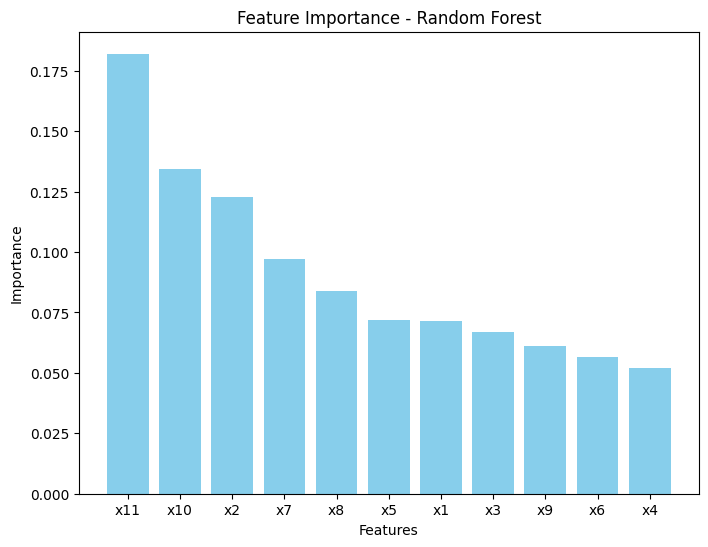

   Feature  Importance
10     x11    0.182068
9      x10    0.134250
1       x2    0.122763
6       x7    0.096947
7       x8    0.083767
4       x5    0.072058
0       x1    0.071434
2       x3    0.066818
8       x9    0.061326
5       x6    0.056542
3       x4    0.052026


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Preprocessing: Menentukan target dan fitur
classes = [3, 4, 5, 6, 7, 8]
df['Good Quality'] = (df['y'] >= 6).astype(int)

# Fitur prediktor
features = ['x1','x2','x3','x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']
X = df[features]
y = df['Good Quality']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Membuat model Random Forest
model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(X_train, y_train)

# Feature Importance
importances = model.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Visualisasi
plt.figure(figsize=(8, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.title('Feature Importance - Random Forest')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

# Print DataFrame
print(feature_importance_df)


Berdasarkan grafik Feature Importances pada Random Forest:

Fitur Paling Penting:

1. Alcohol (x11): Menjadi fitur paling berpengaruh dalam menentukan apakah siswa lulus atau gagal.
2. Sulphates (x10) : Fitur kedua paling penting.
3. Volatile Accidity (x2): Fitur ketiga yang signifikan.

Variabel lainnya seperti fixed accidity, citric acid, residual sugar,chlorides, free sulfur dioxide, total sulfur dioxide, density, pH memiliki kontribusi yang cukup namun tidak sebesar 3 fitur penting yang sudah disebutkan. Kesimpulannya adalah variabel alcohol, sulphates, dan volatile accidity mendominasi kualitas wine.

# Decision Tree

Accuracy of Decision Tree: 0.84

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.50      0.17      0.25         6
           5       0.95      0.98      0.96        96
           6       0.82      0.94      0.87        99
           7       0.38      0.19      0.26        26
           8       0.00      0.00      0.00         2

    accuracy                           0.84       229
   macro avg       0.44      0.38      0.39       229
weighted avg       0.81      0.84      0.82       229



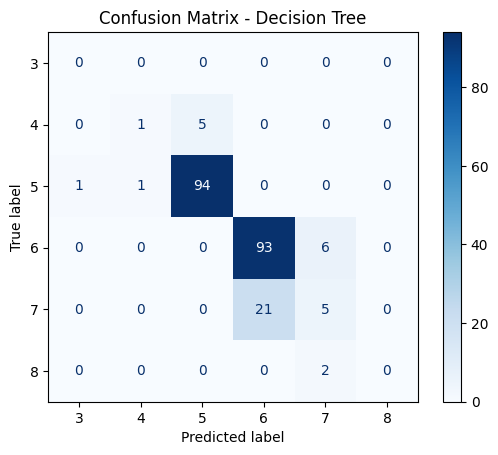

In [ ]:
# Import library yang dibutuhkan
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt


X = df.drop('y', axis=1)  # Fitur (semua kolom kecuali 'quality')
y = df['y']  # Label target (kolom 'quality')

# 2. Membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Melatih model Decision Tree
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)  # Anda dapat mengatur max_depth sesuai kebutuhan
dt_model.fit(x_train, y_train)

# 4. Evaluasi model
y_pred = dt_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of Decision Tree: {accuracy:.2f}")

print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 5. Membuat Confusion Matrix
labels = sorted(y.unique())  # Rentang label dari dataset
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


Penjelasan


---
* Pada Label 3 :
Tidak ada sampel yang menunjukkan di label / rentang ke - 3

* Pada Label 4 :
1. Terdapat 1 sampel yang benar di label / rentang ke - 4
2. Terdapat 5 sampel yang seharusnya di label / rentang ke - 4, tetapi diprediksi salah sebagai label ke - 5

* Pada Label 5 :
1. Terdapat 1 sampel yang seharusnya di label / rentang ke - 5, tetapi di prediksi salah rentang ke - 3
2. Terdapat 1 sampel yang seharusnya di label / rentang ke - 5, tetapi di prediksi salah rentang ke - 4
3. Terdapat 94 sampel yang benar di label / rentang ke - 5

* Pada Label 6 :
1. Terdapat 6 sampel yang seharusnya di label / rentang ke - 6, tetapi di prediksi salah di rentang ke - 7
2. Terdapat 93 sampel yang benar di label / rentang ke - 6

* Pada Label 7 :
1. Terdapat 21 sampel yang seharusnya di label / rentang ke - 7, tetapi di prediksi salah si rentang ke - 8
2. Terdapat 5 sampel yang benar di label / rentang ke - 7

* Pada Label 8 :
1. Terdapat 2 sampel yang seharusnya di label / rentang ke - 8, tetapi di prediksi salah di rentang ke - 7

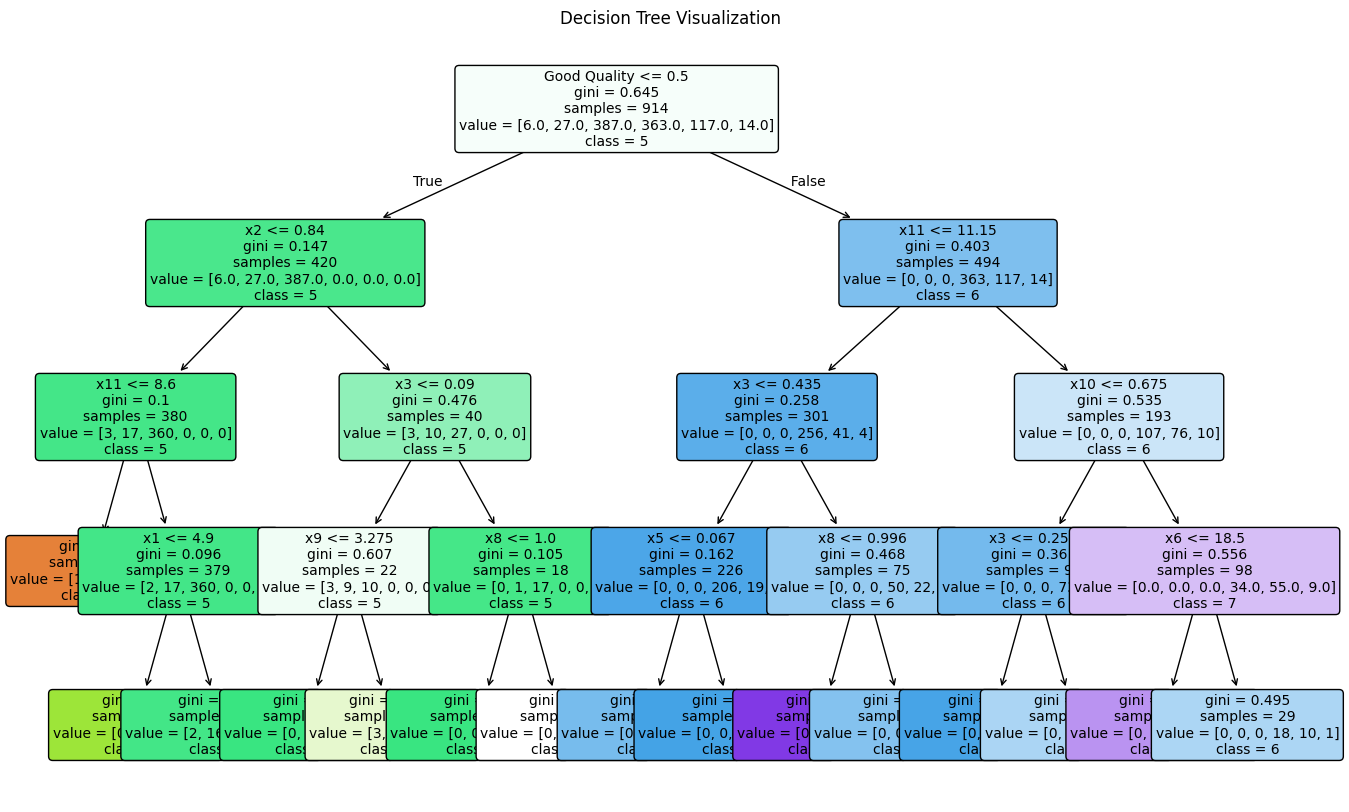

In [ ]:
# 6. Visualisasi Decision Tree
plt.figure(figsize=(16, 10))
plot_tree(
    dt_model,
    feature_names=X.columns,
    class_names=[str(label) for label in labels],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.title("Decision Tree Visualization")
plt.show()

# **Support Vector Machines (SVM)**

Accuracy of SVM: 0.49

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.49      0.64      0.55        96
           6       0.50      0.53      0.51        99
           7       0.00      0.00      0.00        26
           8       0.00      0.00      0.00         2

    accuracy                           0.49       229
   macro avg       0.20      0.23      0.21       229
weighted avg       0.42      0.49      0.45       229



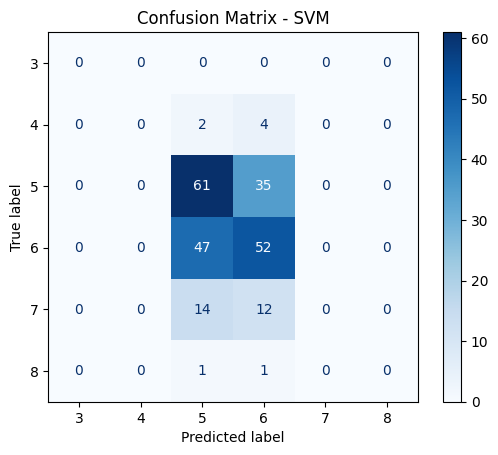

In [ ]:
# Import library yang dibutuhkan
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
import pandas as pd
import matplotlib.pyplot as plt

# 1. Membaca dataset
data = pd.read_csv('WineQT.csv')
X = data.drop('quality', axis=1)
y = data['quality']

# 2. Membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Melatih model SVM
svm_model = SVC(kernel='rbf', C=1, gamma='scale', random_state=42)
svm_model.fit(x_train, y_train)

# 4. Evaluasi model
y_pred = svm_model.predict(x_test)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of SVM: {accuracy:.2f}")

# Laporan klasifikasi
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 5. Membuat Confusion Matrix
labels = sorted(y.unique())  # Rentang label dari dataset
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - SVM")
plt.show()


Penjelasan


---
* Pada Label 3 :
Tidak ada sampel yang menunjukkan di label / rentang ke - 3

* Pada Label 4 :
1. Terdapat 2 sampel yang seharusnya di label / rentang ke - 4, tetapi diprediksi salah sebagai label ke - 5
2. Terdapat 4 sampel yang seharusnya di label / rentang ke - 4, tetapi diprediksi salah sebagai label ke - 6

* Pada Label 5 :
1. Terdapat 61 sampel yang benar di label / rentang ke - 5
2. Terdapat 35 sampel yang seharusnya di label / rentang ke - 5, tetapi di prediksi salah rentang ke - 6

* Pada Label 6 :
1. Terdapat 47 sampel yang seharusnya di label / rentang ke - 6, tetapi di prediksi salah di rentang ke - 5
2. Terdapat 52 sampel yang benar di label / rentang ke - 6

* Pada Label 7 :
1. Terdapat 14 sampel yang seharusnya di label / rentang ke - 7, tetapi di prediksi salah di rentang ke - 5
2. Terdapat 12 sampel yang seharusnya di label / rentang ke - 7, tetapi di prediksi salah di rentang ke - 6

* Pada Label 8 :
1. Terdapat 1 sampel yang seharusnya di label / rentang ke - 8, tetapi di prediksi salah di rentang ke - 5
2. Terdapat 1 sampel yang seharusnya di label / rentang ke - 8, tetapi di prediksi salah di rentang ke - 6

# **K - Nearest Neighbors (KNN)**


Accuracy of KNN: 0.56

Classification Report:
               precision    recall  f1-score   support

           4       0.00      0.00      0.00         6
           5       0.63      0.66      0.64        96
           6       0.55      0.59      0.57        99
           7       0.35      0.27      0.30        26
           8       0.00      0.00      0.00         2

    accuracy                           0.56       229
   macro avg       0.31      0.30      0.30       229
weighted avg       0.54      0.56      0.55       229



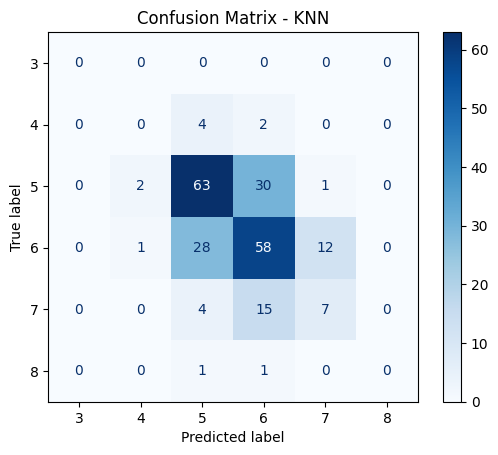

In [ ]:
# Import library yang dibutuhkan
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt

# 1. Membaca dataset
data = pd.read_csv('WineQT.csv')  # Ganti dengan lokasi file dataset Anda
X = data.drop('quality', axis=1)  # Fitur (semua kolom kecuali 'quality')
y = data['quality']  # Label target (kolom 'quality')

# 2. Skalakan fitur menggunakan StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Membagi dataset menjadi training dan testing
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# 4. Melatih model KNN
knn_model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors adalah jumlah tetangga terdekat
knn_model.fit(x_train, y_train)

# 5. Evaluasi model
y_pred = knn_model.predict(x_test)

# Akurasi
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN: {accuracy:.2f}")

# Laporan klasifikasi
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# 6. Membuat Confusion Matrix
labels = sorted(y.unique())  # Rentang label dari dataset
cm = confusion_matrix(y_test, y_pred, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - KNN")
plt.show()


Penjelasan


---
* Pada Label 3 :
Tidak ada sampel yang menunjukkan di label / rentang ke - 3

* Pada Label 4 :
1. Terdapat 4 sampel yang seharusnya di label / rentang ke - 4, tetapi diprediksi salah sebagai label ke - 5
2. Terdapat 2 sampel yang seharusnya di label / rentang ke - 4, tetapi diprediksi salah sebagai label ke - 6

* Pada Label 5 :
1. Terdapat 2 sampel yang seharusnya di label / rentang ke - 5, tetapi di prediksi salah rentang ke - 4
2. Terdapat 63 sampel yang benar di label / rentang ke - 5
3. Terdapat 30 sampel yang seharusnya di label / rentang ke - 5, tetapi di prediksi salah rentang ke - 6
4. Terdapat 1 sampel yang seharusnya di label / rentang ke - 5, tetapi di prediksi salah rentang ke - 7

* Pada Label 6 :
1. Terdapat 1 sampel yang seharusnya di label / rentang ke - 6, tetapi di prediksi salah di rentang ke - 4
2. Terdapat 18 sampel yang seharusnya di label / rentang ke - 6, tetapi di prediksi salah di rentang ke - 5
3. Terdapat 58 sampel yang benar di label / rentang ke - 6
4. Terdapat 12 sampel yang seharusnya di label / rentang ke - 6, tetapi di prediksi salah di rentang ke - 7

* Pada Label 7 :
1. Terdapat 4 sampel yang seharusnya di label / rentang ke - 7, tetapi di prediksi salah di rentang ke - 5
2. Terdapat 15 sampel yang seharusnya di label / rentang ke - 7, tetapi di prediksi salah di rentang ke - 6
3. Terdapat 7 sampel yang benar di label / rentang ke - 7

* Pada Label 8 :
1. Terdapat 1 sampel yang seharusnya di label / rentang ke - 8, tetapi di prediksi salah di rentang ke - 5
2. Terdapat 1 sampel yang seharusnya di label / rentang ke - 8, tetapi di prediksi salah di rentang ke - 6

# Cross Validation

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import numpy as np

# Preprocessing: Menentukan target dan fitur
# Target: Lulus (1) jika average_score >= 60, Tidak lulus (0) jika average_score < 60
classes = [3, 4, 5, 6, 7, 8]
df['Good Quality'] = (df['y'] >= 6).astype(int)

# Fitur prediktor
features = ['x1','x2','x3','x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11']
X = df[features]
y = df['Good Quality']

# Standarisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Inisialisasi model-model yang akan digunakan
models = {
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

# Melakukan cross-validation pada setiap model
cv_results = {}
for model_name, model in models.items():
    cv_scores = cross_val_score(model, X_scaled, y, cv=10, scoring='accuracy')  # 10-fold CV
    cv_results[model_name] = {
        'Mean Accuracy': np.mean(cv_scores),
        'Standard Deviation': np.std(cv_scores)
    }

# Menampilkan hasil cross-validation
for model_name, results in cv_results.items():
    print(f"{model_name}:\n"
          f"  Mean Accuracy: {results['Mean Accuracy']:.4f}\n"
          f"  Standard Deviation: {results['Standard Deviation']:.4f}\n")


K-Nearest Neighbors:
  Mean Accuracy: 0.6772
  Standard Deviation: 0.0532

Naive Bayes:
  Mean Accuracy: 0.7235
  Standard Deviation: 0.0725

Random Forest:
  Mean Accuracy: 0.7402
  Standard Deviation: 0.0541

SVM:
  Mean Accuracy: 0.7402
  Standard Deviation: 0.0607

Decision Tree:
  Mean Accuracy: 0.6719
  Standard Deviation: 0.0457



### **Interpretasi Cross Validation**

1.   K-Nearest Neighbors (KNN):
*   Rata-Rata Akurasi : 0.6772
*   Standar Deviasi : 0.0532
*   Hal ini menunjukkan bahwa model K-Nearest Neighbors (KNN) cukup baik tetapi lebh rendah daripada Random Forest, Support Vector Machines (SVM), dan Gaussian Naive Bayes.
2.   Gaussian Naive Bayes:
*   Rata-Rata Akurasi : 0.7235
*   Standar Deviasi : 0.0725
*   Hal ini menunjukkan bahwa model Gaussian Naive Bayes mempunyai performa yang baik dengan akurasi yang tinggi dan standar deviasi yang rendah dimana lebih rendah daripada Random Forest dan Support Vector Machines (SVM).
3.   Random Forest:
*   Rata-Rata Akurasi : 0.7402
*   Standar Deviasi : 0.0541
*   Hal ini menunjukkan bahwa model Random Forest mempunyai performa yang sangat baik dengan akurasi yang tinggi dan standar deviasi yang rendah dimana model klasifikasi ini sangat cocok digunakan untuk dataset diatas.
4.   Support Vector Machines (SVM):
*   Rata-Rata Akurasi : 0.7402
*   Standar Deviasi : 0.0541
*   Hal ini menunjukkan bahwa model Support Vector Machines (SVM) mempunyai performa yang sangat baik dengan akurasi yang tinggi dan standar deviasi yang rendah dimana model klasifikasi ini sangat cocok digunakan untuk dataset diatas.
3.   Decision Tree:
*   Rata-Rata Akurasi : 0.6719
*   Standar Deviasi : 0.0457
*   Hal ini menunjukkan bahwa model Desicion Tree mempunyai ferforma yang baik tetapi akurasi dan standar deviasinya yang paling rendah daripada model klasifikasi yang lain. Hal ini menunjukkan model Decision Tree tidak cocok digunakan untuk dataset diatas.











### **Kesimpulan**

Berdasarkan rata-rata akurasi Random Forest dan Support Vector Machines (SVM) adalah model klasifikasi terbaik untuk dataset ini karena memiliki akurasi tertinggi dan standar deviasi yang rendah sehingga hal tersebut membuat model konsisten untuk dataset diatas. Gaussian Naive Bayes adalah model alternatif dengan akurasi yang mendekati Random forest dan Support Vector Machines (SVM) dan konsistensi yang baik. Decision Tree dan K-Nearest Neighbors (KNN) memiliki akurasi yang lebih rendah sehingga kurang optimal dibandingkan model yang lainnya untuk dataset diatas